In [1]:
import pandas as pd

In [2]:
tesla=pd.read_csv("tesla.csv")

In [3]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
tesla.shape

(2193, 7)

In [6]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\91955\AppData\Local\Temp\ipykernel_28816\3702129700.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tesla['Date'] = pd.to_datetime(tesla['Date'])


In [7]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


In [8]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [9]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

array([[<AxesSubplot: title={'center': 'Date'}>,
        <AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'High'}>],
       [<AxesSubplot: title={'center': 'Low'}>,
        <AxesSubplot: title={'center': 'Close'}>,
        <AxesSubplot: title={'center': 'Adj Close'}>],
       [<AxesSubplot: title={'center': 'Volume'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

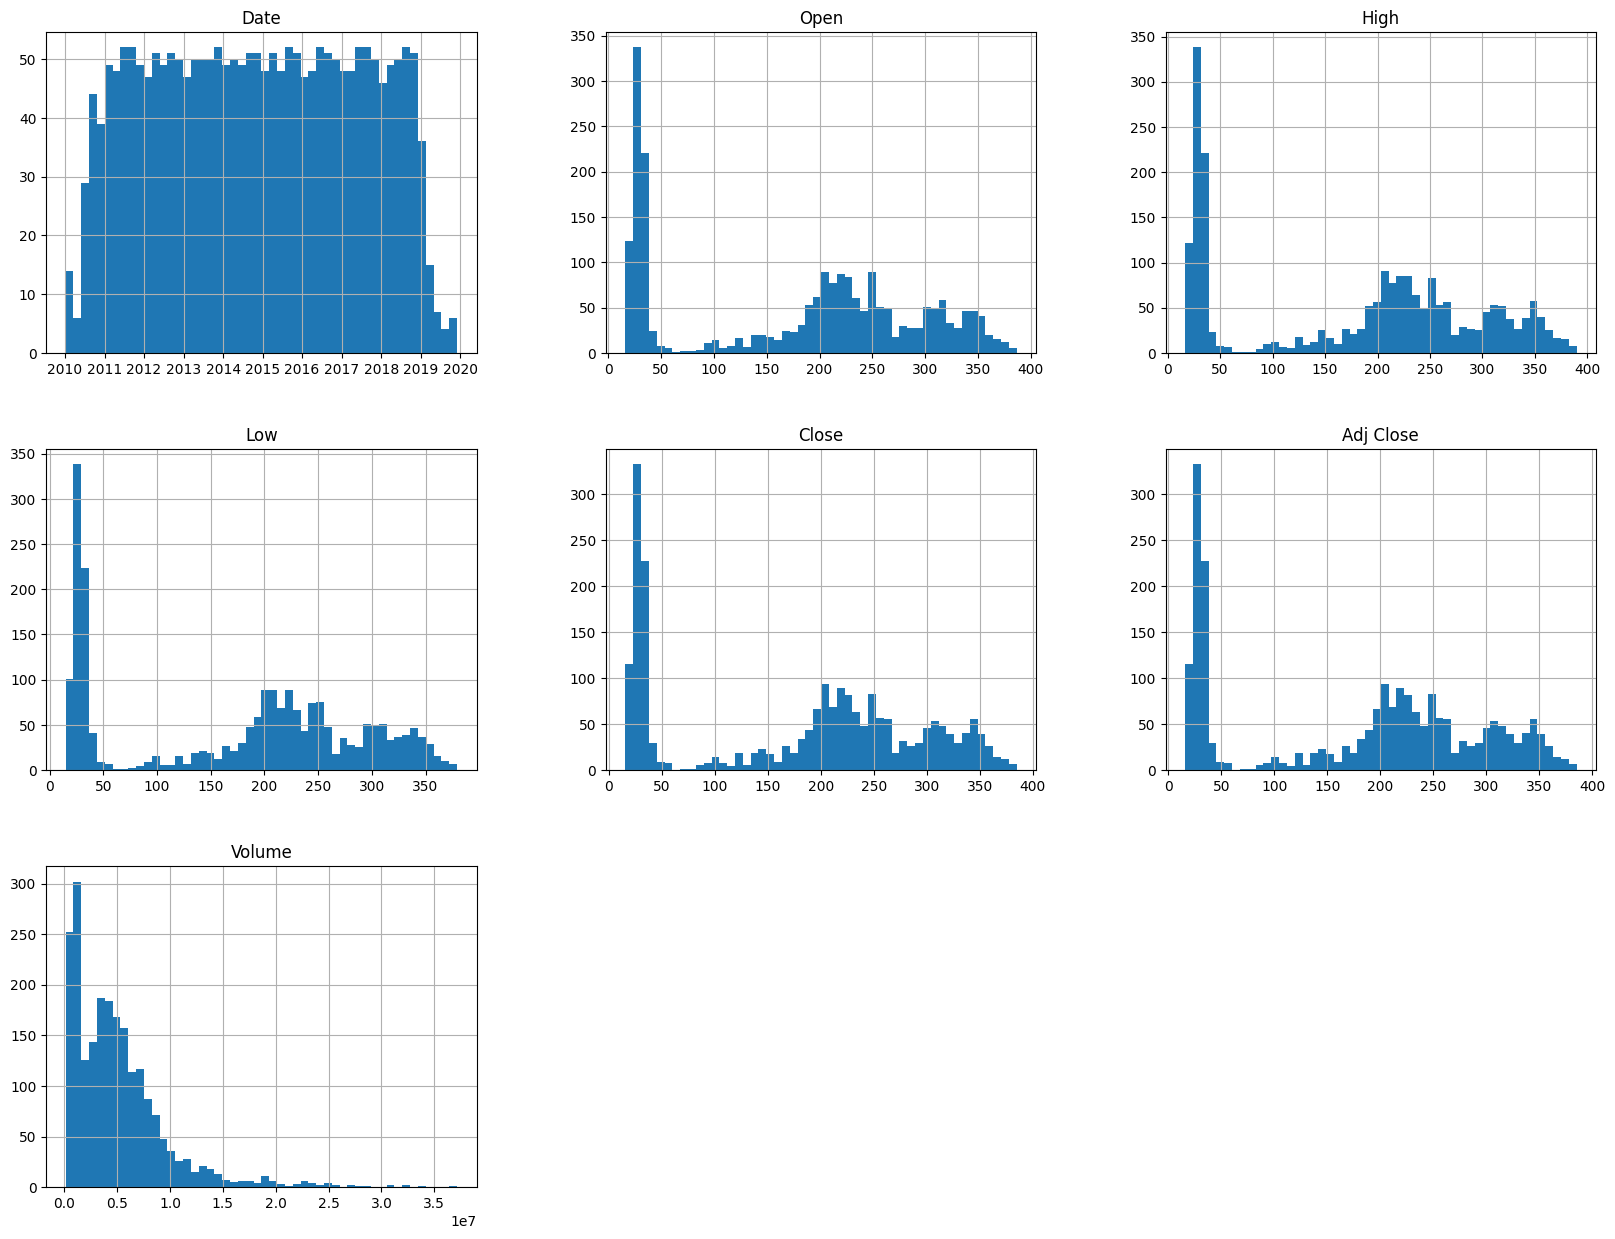

In [12]:
tesla.hist(bins=50,figsize=(20,15))

In [13]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [14]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


In [15]:
tesla.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<AxesSubplot: >

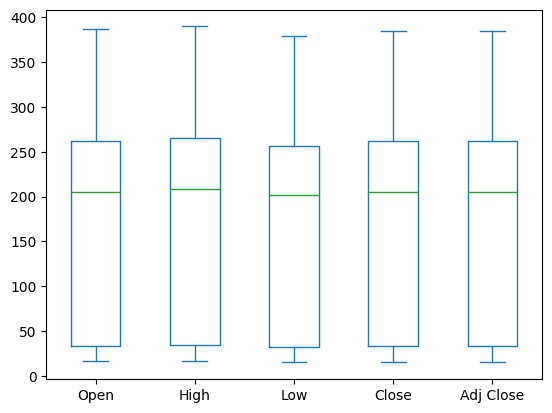

In [16]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [17]:
from sklearn.model_selection import train_test_split
import numpy as np

In [18]:
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [19]:
#feature scaling and creating pipeline


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [21]:
tesla_n_tr=my_pipeline.fit_transform(X_train)

In [22]:
#selecting desired model


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(tesla_n_tr,Y_train)

RandomForestRegressor()

In [24]:
some_data=tesla_n_tr[:5]
some_labels=Y_train[:5]

C:\Users\91955\AppData\Local\Temp\ipykernel_28816\2099990410.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [25]:
prepared_data=my_pipeline.transform(some_data)

In [26]:
model.predict(prepared_data)

array([22.21910029, 22.21910029, 22.21910029, 22.21910029, 22.21910029])

In [27]:
list(some_labels)

[34.189999, 248.089996, 196.610001, 277.850006, 375.339996]

In [28]:
#evaluating the model

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
tesla_predictions=model.predict(tesla_n_tr)

In [31]:
mse=mean_squared_error(Y_train,tesla_predictions)


In [32]:
rmse=np.sqrt(mse)

In [33]:
rmse

2.0984752957017716

In [34]:
#using better evaluating technique-cross validation

In [35]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,tesla_n_tr,Y_train,scoring="neg_mean_squared_error")

In [36]:
rmse_scores=np.sqrt(-scores)

In [37]:
rmse_scores

array([5.77208765, 6.17589119, 5.81601178, 5.56491892, 6.01472585])

In [38]:
def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print('standard deviation',scores.std())
    

In [39]:
print_scores(rmse_scores)

scores [5.77208765 6.17589119 5.81601178 5.56491892 6.01472585]
mean 5.868727076414936
standard deviation 0.20980129470518472
